# الاسم : ندى يوسف اسماعيل يوسف العمراوى
# Name : Nada Youssef Ismail Youssef Amrawy
# ID : 20221446068

## This is a combination code of section and problem assignments **Both**

<ipython-input-4-ef8b292e6198>:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_10_days = pd.concat([results_10_days, pd.DataFrame({


Total Profit for 80 newspapers over 10 days: $-61.80
Total Profit for 90 newspapers over 10 days: $-87.80


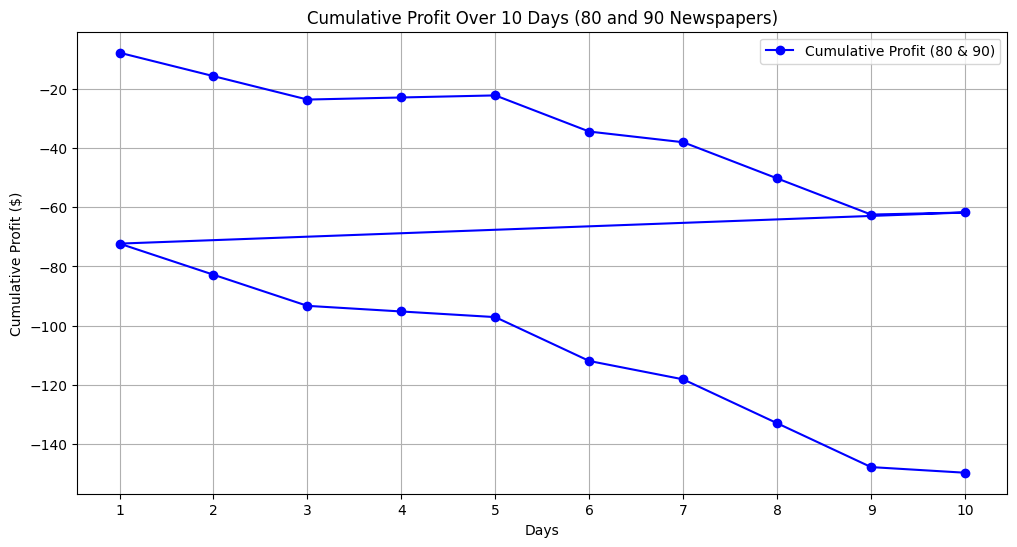


Summary of Total Daily Profit for 10 Days by Purchase Order:
   Purchased  Daily Profit
0         80         -61.8
1         90         -87.8
Total Profit for 50 newspapers over 20 days: $49.70
Total Profit for 60 newspapers over 20 days: $21.70
Total Profit for 70 newspapers over 20 days: $-24.30


<ipython-input-4-ef8b292e6198>:139: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_20_days = pd.concat([results_20_days, pd.DataFrame({


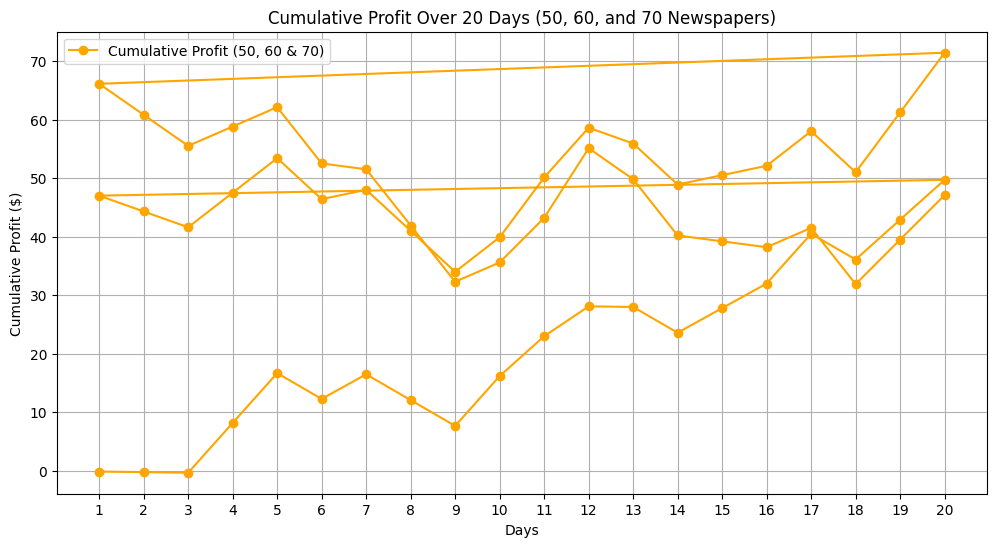


Summary of Total Daily Profit for 20 Days by Purchase Order:
   Purchased  Daily Profit
0         50          49.7
1         60          21.7
2         70         -24.3

Comparison of Total Profit from 10-Day and 20-Day Simulations:
           Purchased  Daily Profit
10 Days 0         80         -61.8
        1         90         -87.8
20 Days 0         50          49.7
        1         60          21.7
        2         70         -24.3


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Simulation parameters
cost_price = 0.33  # Cost price per newspaper
selling_price = 0.50  # Selling price per newspaper
scrap_price = 0.07  # Scrap value per unsold newspaper (adjusted for part 2)

# Demand distribution based on news type
demand_distribution = {
    'Good': {40: 0.4, 50: 0.3, 60: 0.2, 70: 0.1},
    'Fair': {30: 0.2, 40: 0.5, 50: 0.3},
    'Poor': {10: 0.3, 20: 0.5, 30: 0.2},
}

# Random numbers for news type and demand
random_numbers_type = [random.randint(1, 100) for _ in range(20)]
random_numbers_demand = [random.randint(1, 100) for _ in range(20)]

# Parameters for 10 Days
purchase_orders_10_days = [80, 90]
days_10 = 10

# Simulation DataFrame for 10 Days
results_10_days = pd.DataFrame(columns=['Day', 'Purchased', 'News Type', 'Demand',
                                        'Revenue', 'Cost', 'Lost Profit',
                                        'Scrap Revenue', 'Daily Profit'])

# Simulation for 10 Days
for purchase_order in purchase_orders_10_days:
    total_profit = 0

    for day in range(days_10):
        # Determine News Type
        rn_type = random_numbers_type[day % len(random_numbers_type)]
        if 1 <= rn_type <= 35:
            news_type = 'Good'
        elif 36 <= rn_type <= 80:
            news_type = 'Fair'
        else:
            news_type = 'Poor'

        # Determine Demand
        rn_demand = random_numbers_demand[day % len(random_numbers_demand)]
        demand = 0
        cumulative_prob = 0

        # Calculate demand based on the news type probabilities
        for demand_value, probability in demand_distribution[news_type].items():
            cumulative_prob += probability
            if cumulative_prob * 100 >= rn_demand:
                demand = demand_value
                break

        # Calculate Revenue, Cost, Lost Profit, and Scrap Revenue
        revenue = min(demand, purchase_order) * selling_price
        cost = purchase_order * cost_price
        lost_profit = max(0, (demand - purchase_order) * (selling_price - cost_price))
        scrap_revenue = (purchase_order - demand) * scrap_price if demand < purchase_order else 0
        daily_profit = revenue - cost - lost_profit + scrap_revenue

        # Store results
        results_10_days = pd.concat([results_10_days, pd.DataFrame({
            'Day': [day + 1],
            'Purchased': [purchase_order],
            'News Type': [news_type],
            'Demand': [demand],
            'Revenue': [revenue],
            'Cost': [cost],
            'Lost Profit': [lost_profit],
            'Scrap Revenue': [scrap_revenue],
            'Daily Profit': [daily_profit]
        })], ignore_index=True)

        total_profit += daily_profit

    print(f'Total Profit for {purchase_order} newspapers over {days_10} days: ${total_profit:.2f}')

# Graphing Results for 10 Days
plt.figure(figsize=(12, 6))
plt.plot(results_10_days['Day'], results_10_days['Daily Profit'].cumsum(), marker='o', label='Cumulative Profit (80 & 90)', color='blue')
plt.title('Cumulative Profit Over 10 Days (80 and 90 Newspapers)')
plt.xlabel('Days')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(range(1, days_10 + 1))
plt.grid()
plt.legend()
plt.show()

# Display results in a summary table for 10 days
results_grouped_10 = results_10_days.groupby('Purchased').agg({'Daily Profit': 'sum'}).reset_index()
print("\nSummary of Total Daily Profit for 10 Days by Purchase Order:")
print(results_grouped_10)

# Parameters for 20 Days
purchase_orders_20_days = [50, 60, 70]
days_20 = 20

# Simulation DataFrame for 20 Days
results_20_days = pd.DataFrame(columns=['Day', 'Purchased', 'News Type', 'Demand',
                                        'Revenue', 'Cost', 'Lost Profit',
                                        'Scrap Revenue', 'Daily Profit'])

# Simulation for 20 Days
for purchase_order in purchase_orders_20_days:
    total_profit = 0

    for day in range(days_20):
        # Determine News Type
        rn_type = random_numbers_type[day % len(random_numbers_type)]
        if 1 <= rn_type <= 35:
            news_type = 'Good'
        elif 36 <= rn_type <= 80:
            news_type = 'Fair'
        else:
            news_type = 'Poor'

        # Determine Demand
        rn_demand = random_numbers_demand[day % len(random_numbers_demand)]
        demand = 0
        cumulative_prob = 0

        # Calculate demand based on the news type probabilities
        for demand_value, probability in demand_distribution[news_type].items():
            cumulative_prob += probability
            if cumulative_prob * 100 >= rn_demand:
                demand = demand_value
                break

        # Calculate Revenue, Cost, Lost Profit, and Scrap Revenue
        revenue = min(demand, purchase_order) * selling_price
        cost = purchase_order * cost_price
        lost_profit = max(0, (demand - purchase_order) * (selling_price - cost_price))
        scrap_revenue = (purchase_order - demand) * scrap_price if demand < purchase_order else 0
        daily_profit = revenue - cost - lost_profit + scrap_revenue

        # Store results
        results_20_days = pd.concat([results_20_days, pd.DataFrame({
            'Day': [day + 1],
            'Purchased': [purchase_order],
            'News Type': [news_type],
            'Demand': [demand],
            'Revenue': [revenue],
            'Cost': [cost],
            'Lost Profit': [lost_profit],
            'Scrap Revenue': [scrap_revenue],
            'Daily Profit': [daily_profit]
        })], ignore_index=True)

        total_profit += daily_profit

    print(f'Total Profit for {purchase_order} newspapers over {days_20} days: ${total_profit:.2f}')

# Graphing Results for 20 Days
plt.figure(figsize=(12, 6))
plt.plot(results_20_days['Day'], results_20_days['Daily Profit'].cumsum(), marker='o', label='Cumulative Profit (50, 60 & 70)', color='orange')
plt.title('Cumulative Profit Over 20 Days (50, 60, and 70 Newspapers)')
plt.xlabel('Days')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(range(1, days_20 + 1))
plt.grid()
plt.legend()
plt.show()

# Display results in a summary table for 20 days
results_grouped_20 = results_20_days.groupby('Purchased').agg({'Daily Profit': 'sum'}).reset_index()
print("\nSummary of Total Daily Profit for 20 Days by Purchase Order:")
print(results_grouped_20)

# Compare profits from both simulations
print("\nComparison of Total Profit from 10-Day and 20-Day Simulations:")
combined_results = pd.concat([results_grouped_10, results_grouped_20], keys=['10 Days', '20 Days'])
print(combined_results)
